In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from PIL import Image
import PIL
import os
import glob
import statistics

from scipy.stats import binom
from scipy import stats
from scipy.special import comb
import matplotlib.image as mpimg



I will upload the JPG of 1a seperately so that you can view at a larger size


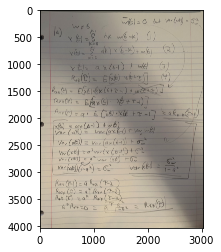

In [172]:
#1a: 
image = Image.open('1a.jpg')

img=mpimg.imread('1a.jpg')

imgplot = plt.imshow(img)
print('I will upload the JPG of 1a seperately so that you can view at a larger size')

1b: Compared to noise (in black), the mean appears to be near zero but the variance from zero is much higher than sigma squared. That being said, it is smoother than noise as it is affected by its previous value times a as seen in equation 3. With an a = 0.99, the next signal value should not change as much from the change in white noise- instead the next value should be the previous value (* 0.99) and the new white noise value, effectively cutting the change in signal in half while keeping the average at 0. It is nearly double the smoothness of white noise.


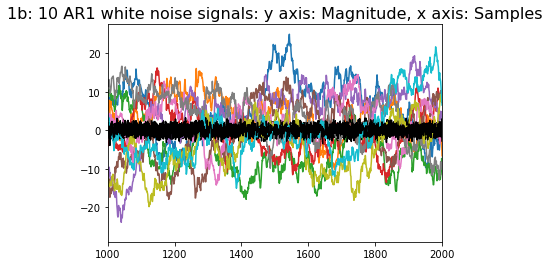

In [173]:
#1b: 
a = .99
sigmaSQ = 1
signal = []

for i in range(0,10):
    
    x = np.zeros(2000) #2000 sample
    w = np.random.randn(2000) #2000 sample noise
    x[0] = w[0]
    
    for i in range(1, 2000):
        x[i] = a*x[i-1] + w[i] #equation 3
        
    signal.append(x)
    
    plt.plot(x)
    plt.plot(w, 'k')
   
plt.title('1b: 10 AR1 white noise signals: y axis: Magnitude, x axis: Samples', fontsize = 16)
plt.xlim(1000,2000)

print('1b: Compared to noise (in black), the mean appears to be near zero but the variance from zero is much higher than sigma squared. That being said, it is smoother than noise as it is affected by its previous value times a as seen in equation 3. With an a = 0.99, the next signal value should not change as much from the change in white noise- instead the next value should be the previous value (* 0.99) and the new white noise value, effectively cutting the change in signal in half while keeping the average at 0. It is nearly double the smoothness of white noise.')

In [174]:
#1c: 
TrueVariance = 1/(1-a**2)

VarianceSignal = np.zeros(10)

for i in range(0,10):
    VarianceSignal[i] = statistics.variance(signal[i])

avgVarianceSignal = np.mean(VarianceSignal)
print('1c: The True value of Variance is:',"{:.2f}".format(TrueVariance), 'but the actual calculated variance is:', "{:.2f}".format(avgVarianceSignal),'Regardless of how many times the code is ran, the true variance is always higher than the actual variance of the signal. This might be due to the built in variance of the random.randn function in python. The variances are similar enough to prove the model effective.')


1c: The True value of Variance is: 50.25 but the actual calculated variance is: 53.34 Regardless of how many times the code is ran, the true variance is always higher than the actual variance of the signal. This might be due to the built in variance of the random.randn function in python. The variances are similar enough to prove the model effective.


In [175]:
#1d:

def ar1(a, Nsamps,Nexamples): #Autoregressive function
    x = [] #initializes the signal

    for i in range(Nexamples):
        w = np.random.randn(Nsamps) #creation of noise
        xcurrent = np.zeros(Nsamps) #creation of an empty signal process value
        xcurrent[0] = w[0] #sets start point the same
    
        for i in range(1, Nsamps):
            xcurrent[i] = a*xcurrent[i-1] + w[i] #signal based on equation 3

        xcurrent = xcurrent / (1/(1-a**2)) **(1/2) #divides standard deviation
        x.append(xcurrent) #creates the output
        
    return x
print('1d: See code above!')


1d: See code above!


1e: As a increases, the amount of smooothing of the signal also increases. This is because the total amount that the value of x[i] depends on the amount of x[i-1] increases. In other words, as variable a approaches zero, the white noise moreso determines the next value, but as a approaches 1, the white noise becomes less and less dominant in regards to the next value. Additionally from 1a, since Variance of the signal = variance(noise) / (1-a^2) , as a increases, the variance decreases, leaving a smoother signal.


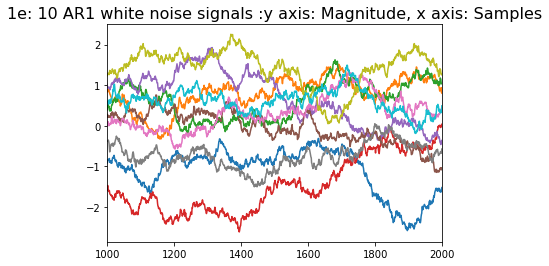

In [176]:
#1e

NewA = ar1(.999,2000,10)
    
for i in range(10):
    plt.plot(NewA[i])
    
plt.title('1e: 10 AR1 white noise signals :y axis: Magnitude, x axis: Samples', fontsize = 16)
#plt.set_ylabel('Magnitude')
#plt.xlabel('Samples')
plt.xlim(1000,2000)


print('1e: As a increases, the amount of smooothing of the signal also increases. This is because the total amount that the value of x[i] depends on the amount of x[i-1] increases. In other words, as variable a approaches zero, the white noise moreso determines the next value, but as a approaches 1, the white noise becomes less and less dominant in regards to the next value. Additionally from 1a, since Variance of the signal = variance(noise) / (1-a^2) , as a increases, the variance decreases, leaving a smoother signal.')

In [177]:
#1f 

NewbornHearing = ar1(.99,2000,1000)

MaximumVal = np.amax(NewbornHearing,1)

ct = 0
for i in range(0,len(MaximumVal)):
    if MaximumVal[i] > 4:
        ct += 1

print('1f: Of the 1000 examples, there are',ct,'occasions where the maximum value of x is above 4.')

1f: Of the 1000 examples, there are 5 occasions where the maximum value of x is above 4.


In [178]:
#2a

TestQ = 50;
AnswerChoices = 4;
ViableChoices = 3;

Expected_score = TestQ*2/ViableChoices

print('2a: Expected score if test is taken at random with 3 viable choices is',"{:.3f}".format(Expected_score),'%')


2a: Expected score if test is taken at random with 3 viable choices is 33.333 %


In [179]:
#2b
#How many questions would they need to get correct to reject the null hypothesis that they are simply guessing
#needs to be greater than 1/3 of 50 questions - does it need to be 38%? 
# what is the limit for the top 5%


FullModel = []
CorrectAns = []
for i in range(0,10000): 
    FullModel = np.random.choice([0, 1], size=50, p=[.66666665, .33333335])
    CorrectAns.append(sum(FullModel)) 

CorrectAns.sort()
print('2B: The top 5th percentile of guessing contains',CorrectAns[-200], 'correct answers')


2B: The top 5th percentile of guessing contains 24 correct answers


In [180]:
#2c
#p = 0.5 = 0, p = 0.05 = 1, p = 0/005 = 2, etc... How many correct to receive p = 0.5^-15th

p = .5 * pow(10,-15)
Questions = 50      #samples n     
CorrectQ = 1/3 # 
IncorrectQ = 2/3 #q

for i in np.arange(15,50):
    Perfect = comb(Questions,i) * (CorrectQ)**(i) * (IncorrectQ)**(Questions-i)
    if Perfect < p:
        break
print('2C: In order to get full credit, the student must answer',i,'questions correct, leaving a', Perfect, 'p-value which is less than 0.5*10^-15')

2C: In order to get full credit, the student must answer 45 questions correct, leaving a 9.444283333066275e-17 p-value which is less than 0.5*10^-15


In [181]:
#3a
#50% have disease
falsealarm  = .10 #specificify = 90% 
sensitivity = .10 #hit rate = 90%
Prevalance = .5 #half of pop
hitrate = .90

TrueFalsePos = (Prevalance*hitrate) / ((Prevalance*hitrate) + (Prevalance*falsealarm)) #bayes rule

print('3a:',"{:.2f}".format(TrueFalsePos*100),'% possibility of random individual actually having the disease and testing positive for it')

3a: 90.00 % possibility of random individual actually having the disease and testing positive for it


In [182]:
#3b: 
pop = 10000 #people
population = np.zeros(pop)

Healthy = []

TotAfflicted = []
population = np.random.choice([0, 1], size=pop, p=[1-Prevalance, Prevalance])
TotAfflicted.append(sum(population)) 

#print(TotAfflicted)
Tafflicted = TotAfflicted[0]


truepositives = (1 - sensitivity) * (Tafflicted)
truenegatives = (1- falsealarm) * (pop-Tafflicted)
falsepositive = (sensitivity)* (pop-Tafflicted)
falsenegative = falsealarm * (Tafflicted)
TruePosRatio = (falsepositive+ truepositives)/ Tafflicted
Trulypos = truepositives / (truepositives + falsepositive)
print('3b: The number of true positives is:',truepositives,'given 50% prevalance. The number of false positives is:', falsepositive,' given the hit rate and prevalance and the total afflicted are:',Tafflicted, 'Therefore the ratio of people that ended uo with a positive test and the proportion that actually have the disease are:',"{:.2f}".format(Trulypos*100),'%')


3b: The number of true positives is: 4545.900000000001 given 50% prevalance. The number of false positives is: 494.90000000000003  given the hit rate and prevalance and the total afflicted are: 5051 Therefore the ratio of people that ended uo with a positive test and the proportion that actually have the disease are: 90.18 %


In [183]:
#3c 3d: 
pop = 10000 #people
NewPrev = 0.01
Newpopulation = np.zeros(pop)

NewTotAfflicted = []
Newpopulation = np.random.choice([0, 1], size=pop, p=[1-NewPrev, NewPrev])
NewTotAfflicted.append(sum(Newpopulation)) #Array of only afflicted individuals
NewTafflicted = NewTotAfflicted[0] #convert from a list to an int


truepositives = (1 - sensitivity) * (NewTafflicted)
truenegatives = (1- falsealarm) * (pop-NewTafflicted)
falsepositive = (sensitivity)* (pop-NewTafflicted)
falsenegative = falsealarm * (NewTafflicted)
#TruePosRatio = (falsepositive + truepositives)/ NewTafflicted
doublepos = truepositives * (1 - sensitivity)
triplepos = doublepos * (1 - sensitivity)
doublefalsepos = (sensitivity)* falsepositive
triplefalsepos = (sensitivity)* doublefalsepos

probsingleposreal = truepositives / (truepositives+falsepositive)
probdoubleposreal = doublepos / (doublefalsepos+doublepos)
probtripleposreal = triplepos / (triplefalsepos +triplepos)


print('3c: The number of true positives is:',"{:.0f}".format(truepositives),'given 1% prevalance. The number of false positives is:', "{:.0f}".format(falsepositive),' given the hit rate and prevalance and the total afflicted are:',NewTafflicted, 'Therefore the ratio of people that ended up with a positive test and the proportion that actually have the disease are:',"{:.2f}".format(probsingleposreal*100),'%')
print('3d: The number of true double positives is:',"{:.0f}".format(doublepos),'. The false double positives are',"{:.0f}".format(doublefalsepos),'Leaving a',"{:.2f}".format(probdoubleposreal*100),'% chance that a double positive actually has the disease')
print('3d: But when testing thrice, The number of true triple positives is:',"{:.0f}".format(triplepos),'. The false triple positives are',"{:.0f}".format(triplefalsepos),'Leaving a',"{:.2f}".format(probtripleposreal*100),'% chance that a triple positive actually has the disease')


3c: The number of true positives is: 101 given 1% prevalance. The number of false positives is: 989  given the hit rate and prevalance and the total afflicted are: 112 Therefore the ratio of people that ended up with a positive test and the proportion that actually have the disease are: 9.25 %
3d: The number of true double positives is: 91 . The false double positives are 99 Leaving a 47.85 % chance that a double positive actually has the disease
3d: But when testing thrice, The number of true triple positives is: 82 . The false triple positives are 10 Leaving a 89.20 % chance that a triple positive actually has the disease
